# Tutorial 1: Introduction to Machine Learning with Python

The goal of this tutorial is to introduce a typical workflow in carrying out ML in Python. This includes, 

1. accessing and organising data,

2. assessing the data,

3. visualising the data,

4. a) creating training, b) test datasets and c) learning a model using them and evaluating its performance. 

In [1]:
import numpy as np
import pandas

from matplotlib import pyplot as plt

%matplotlib inline

# Set the default figure size.
plt.rcParams["figure.figsize"] = (10, 8)

## 1) Load Data 

Here, we shall load the Iris dataset from a publically available source. 

This dataset consists of 150 samples of 3 classes of iris plants; each datapoint consists of 4 attributes, the 'sepal-length', 'sepal-width', 'petal-length' and'petal-width'. 

Once the data has been downloaded, we can organise them into their classes.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# if loading from web doesn't work, this file is already stored in the repository. Uncomment following if necessary.
# url = "./iris.csv"

column_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

raw_dataset = pandas.read_csv(url, names=column_names)

# print the raw dataset
print(raw_dataset)

# Organise data by class
dataset = raw_dataset.groupby('class')

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

## 2) Statistics of the dataset

Pandas has some convenience methods that allow us to easily calculate statistical properties of a dataset.

In [3]:
# Calculate the mean of each attribute. E.g

dataset.mean()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [4]:
# Calculate the standard deviation of each attribute

dataset.std()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [5]:
# Show the minimum of each attribute

dataset.min()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [6]:
# Show the maximum of each attribute

dataset.max()

,sepal-length,sepal-width,petal-length,petal-width
class,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


## 3) Visualise the dataset

Pandas has some convenience functions that allow us to easily visualise our dataset.

[This is the documentation for the basic tools available in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

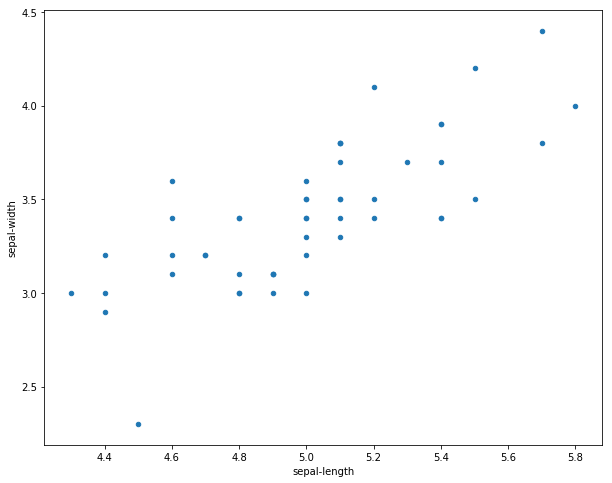

In [7]:
# Try some of them here. 
# For example, here we will plot scatter graphs for the Iris-setosa class:

dataset.get_group("Iris-setosa").plot.scatter(x="sepal-length", y="sepal-width")

## 4) Classification using Least Squares

Here we will be carrying out classification using the least squares formulation on 2 classes of the dataset. 

a) Create separate datasets for the classes 'Iris-setosa' and 'Iris-versicolor'.

In [8]:
setosa = dataset.get_group("Iris-setosa").dropna()
versicolor = dataset.get_group("Iris-versicolor").dropna()

b) create an output vector $Y^k$, for each class, where $y_i^k = 1$ if $k = $'Iris-setosa' and $-1$ otherwise.

In [9]:
setosa_y = list(np.tile(np.array([1]), [len(setosa)]))
versicolor_y = list(np.tile(np.array([-1]), [len(versicolor)]))

setosa['output'] = setosa_y
versicolor['output'] = versicolor_y

assert setosa.shape == (50, 5)
assert versicolor.shape == (50, 5)

c) create training and test datasets, with 20% of the data for testing (80 training points and 20 testing points). 

In [10]:
# Make sure that data from each class is equally distributed.

# Random sample of 40 training points
setosa_train = setosa.sample(40)

# Create and use mask to get Set - Training set
_mask = setosa.isin(setosa_train)
setosa_test = setosa[~_mask].dropna()

# As above.
versicolor_train = versicolor.sample(40)
_mask = versicolor.isin(versicolor_train)
versicolor_test = versicolor[~_mask].dropna()

# Combine to create training and testing datasets

training_data = setosa_train.append(versicolor_train)
test_data = setosa_test.append(versicolor_test)

assert training_data.shape == (80, 5)
assert test_data.shape == (20, 5)

d) apply the least squares solution to obtain an optimal solution for different combinations of the 4 available attributes.

In [26]:
# Create all possible combinations of attributes. 

# Itertools is a great python library that lets you deal with iterables in efficient ways. 
from itertools import chain, combinations
def all_combinations(attributes):
    return chain(*map(lambda i: combinations(attributes, i), range(1, len(attributes)+1)))

_attributes = [name for name in column_names if name != 'class']
attribute_combinations = all_combinations(_attributes) #Note that this is an iterable object. 

# Write a function that takes in a list of attributes, and outputs the predictions after carrying out least squares.
def return_predictions(attributes, training_data=training_data, testing_data=test_data):    
    
    X = training_data[attributes].values.reshape(-1, len(attributes))
    _ = np.tile(np.array([1]), [X.shape[0]]).reshape(-1,1)
    X = np.append(_, X, axis=1)
    
    Y = training_data["output"].values.reshape(-1, 1)
    
    X_test = test_data[attributes].values.reshape(-1, len(attributes))
    _ = np.tile(np.array([1]), [X_test.shape[0]]).reshape(-1,1)
    X_test = np.append(_, X_test, axis=1)
    
    # Least squares solution
    W_opt = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, Y))

    predictions = np.matmul(X_test, W_opt)
    
    return predictions

e) evaluate which input attributes are the best.

In [27]:
# Write a function that takes in a predictions vector, and outputs the mean squared error.
def return_mse(predictions, testing_data=test_data):
    Y_test = test_data["output"].values.reshape(-1, 1)
    
    error = Y_test - predictions

    square_error = np.square(error)
    
    mse = np.mean(square_error)
    
    return mse

# evaluate
attribute_combinations = all_combinations(_attributes)
for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")

('sepal-length',)                                                      MSE: 0.6148658113377182
('sepal-width',)                                                       MSE: 0.4063313342895099
('petal-length',)                                                      MSE: 0.11487651121169344
('petal-width',)                                                       MSE: 0.08654715778884593
('sepal-length', 'sepal-width')                                        MSE: 0.19424208404831023
('sepal-length', 'petal-length')                                       MSE: 0.08918391861390218
('sepal-length', 'petal-width')                                        MSE: 0.08013569741630254
('sepal-width', 'petal-length')                                        MSE: 0.0817615767251329
('sepal-width', 'petal-width')                                         MSE: 0.0655140430470795
('petal-length', 'petal-width')                                        MSE: 0.10742756774427095
('sepal-length', 'sepal-width', 'petal-lengt

In [15]:
attribute_combinations = all_combinations(_attributes)

for attributes in attribute_combinations:
    preds = return_predictions(list(attributes))
    print(f"{str(attributes):<70} MSE: {return_mse(preds)}")

In [16]:
print(*attribute_combinations)